https://github.com/aymericdamien/TensorFlow-Examples

## 1. Introduction

### Hell World

In [1]:
import tensorflow as tf
# Simple hello world using TensorFlow

# Create a Constant op
# The op is added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.

hello = tf.constant('Hello, TensorFlow!')

In [2]:
# Start tf session
sess = tf.Session()

In [3]:
# Run graph
print(sess.run(hello))

b'Hello, TensorFlow!'


### Basic Operations 

In [4]:
# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op.
a = tf.constant(2)
b = tf.constant(3)

In [9]:
# Launch the default graph.
with tf.Session() as sess:
    print("a: %i" % sess.run(a), "b: %i" % sess.run(b))
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


In [10]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [11]:
# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

In [14]:
# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


In [15]:
# ----------------
# More in details:
# Matrix Multiplication from TensorFlow official tutorial

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

In [16]:
# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

In [17]:
# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

In [20]:
# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of threes ops in the
# graph: the two constants and matmul.
#
# The output of the op is returned in 'result' as a numpy `ndarray` object.
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12.]]


### TensorFlow Eager API basics

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# Set Eager API
print("Setting Eager mode...")
tf.enable_eager_execution()
tfe = tf.contrib.eager

Setting Eager mode...
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
# Define constant tensors
print("Define constant tensors")
a = tf.constant(2)
print("a = %i" % a)
b = tf.constant(3)
print("b = %i" % b)

Define constant tensors
a = 2
b = 3


In [4]:
# Run the operation without the need for tf.Session
print("Running operations, without tf.Session")
c = a + b
print("a + b = %i" % c)
d = a * b
print("a * b = %i" % d)

Running operations, without tf.Session
a + b = 5
a * b = 6


In [5]:
# Full compatibility with Numpy
print("Mixing operations with Tensors and Numpy Arrays")

# Define constant tensors
a = tf.constant([[2., 1.],
                 [1., 0.]], dtype=tf.float32)
print("Tensor:\n a = %s" % a)
b = np.array([[3., 0.],
              [5., 1.]], dtype=np.float32)
print("NumpyArray:\n b = %s" % b)

Mixing operations with Tensors and Numpy Arrays
Tensor:
 a = tf.Tensor(
[[2. 1.]
 [1. 0.]], shape=(2, 2), dtype=float32)
NumpyArray:
 b = [[3. 0.]
 [5. 1.]]


In [6]:
# Run the operation without the need for tf.Session
print("Running operations, without tf.Session")

c = a + b
print("a + b = %s" % c)

d = tf.matmul(a, b)
print("a * b = %s" % d)

Running operations, without tf.Session
a + b = tf.Tensor(
[[5. 1.]
 [6. 1.]], shape=(2, 2), dtype=float32)
a * b = tf.Tensor(
[[11.  1.]
 [ 3.  0.]], shape=(2, 2), dtype=float32)


In [7]:
print("Iterate through Tensor 'a':")
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print(a[i][j])

Iterate through Tensor 'a':
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


## 2. Basic Models

### Linear Regression

In [1]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.106208548 W= 0.34528488 b= 0.113070354
Epoch: 0100 cost= 0.102828495 W= 0.33959362 b= 0.15401246
Epoch: 0150 cost= 0.099838980 W= 0.33424088 b= 0.19251956
Epoch: 0200 cost= 0.097194940 W= 0.3292066 b= 0.22873661
Epoch: 0250 cost= 0.094856493 W= 0.3244716 b= 0.26279962
Epoch: 0300 cost= 0.092788309 W= 0.32001814 b= 0.29483697
Epoch: 0350 cost= 0.090959176 W= 0.31582972 b= 0.32496876
Epoch: 0400 cost= 0.089341559 W= 0.31189027 b= 0.35330805
Epoch: 0450 cost= 0.087910898 W= 0.3081852 b= 0.37996247
Epoch: 0500 cost= 0.086645663 W= 0.30470034 b= 0.4050318
Epoch: 0550 cost= 0.085526802 W= 0.30142298 b= 0.4286092
Epoch: 0600 cost= 0.084537305 W= 0.29834047 b= 0.45078474
Epoch: 0650 cost= 0.083662257 W= 0.29544124 b= 0.47164178
Epoch: 0700 cost= 0.082888469 W= 0.2927144 b= 0.49125788
Epoch: 0750 cost= 0.082204200 W= 0.29014996 b= 0.5097074
Epoch: 0800 cost= 0.081599116 W= 0.28773782 b= 0.5270596
Epoch: 0850 cost= 0.081064075 W= 0.28546917 b= 0.54338
Epoch: 0900 cost= 0.0805

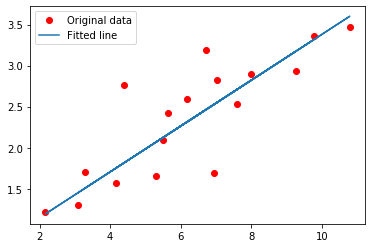

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### Linear Regression (eager api)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [4]:
# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [5]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

Initial cost= 22.056007385 W= -0.6179227 b= -0.094497114
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0001 cost= 6.711404800 W= -0.17721999 b= -0.031399384
Epoch: 0100 cost= 0.104648262 W= 0.3460262 b= 0.12960956
Epoch: 0200 cost= 0.098670289 W= 0.33523065 b= 0.20614527
Epoch: 0300 cost= 0.093981504 W= 0.32566977 b= 0.27392757
Epoch: 0400 cost= 0.090303950 W= 0.31720236 b= 0.33395764
Epoch: 0500 cost= 0.087419450 W= 0.30970338 b= 0.3871221
Epoch: 0600 cost= 0.085157029 W= 0.30306205 b= 0.43420607
Epoch: 0700 cost= 0.083382547 W= 0.2971803 b= 0.47590506
Epoch: 0800 cost= 0.081990749 W= 0.29197127 b= 0.5128348
Epoch: 0900 cost= 0.080899082 W= 0.28735802 b= 0.54554075
Epoch: 1000 cost= 0.080042869 W= 0.28327236 b= 0.57450616


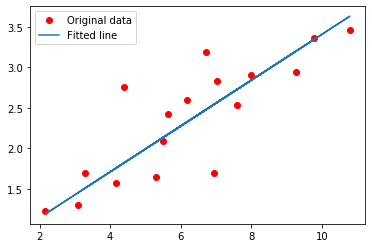

In [6]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()

### Nearest Neighbor

In [6]:
import numpy as np
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [16]:
?tf.argmin

In [7]:
# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
# tf.placeholder(dtype, shape=None, name=None)
# 784是图片的像素28 * 28
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
# 按行求和
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.argmin(distance, 0)# 返回矩阵横列或者纵列的最小值的坐标，取决于第二个参数 

accuracy = 0.

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [8]:

# Start training
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

Test 0 Prediction: 8 True Class: 8
Test 1 Prediction: 7 True Class: 7
Test 2 Prediction: 0 True Class: 0
Test 3 Prediction: 0 True Class: 0
Test 4 Prediction: 0 True Class: 0
Test 5 Prediction: 3 True Class: 3
Test 6 Prediction: 0 True Class: 8
Test 7 Prediction: 7 True Class: 7
Test 8 Prediction: 7 True Class: 7
Test 9 Prediction: 7 True Class: 7
Test 10 Prediction: 0 True Class: 0
Test 11 Prediction: 0 True Class: 0
Test 12 Prediction: 2 True Class: 2
Test 13 Prediction: 4 True Class: 4
Test 14 Prediction: 8 True Class: 8
Test 15 Prediction: 4 True Class: 4
Test 16 Prediction: 5 True Class: 5
Test 17 Prediction: 9 True Class: 4
Test 18 Prediction: 6 True Class: 6
Test 19 Prediction: 7 True Class: 7
Test 20 Prediction: 6 True Class: 6
Test 21 Prediction: 1 True Class: 1
Test 22 Prediction: 0 True Class: 0
Test 23 Prediction: 8 True Class: 8
Test 24 Prediction: 9 True Class: 9
Test 25 Prediction: 5 True Class: 5
Test 26 Prediction: 0 True Class: 0
Test 27 Prediction: 4 True Class: 4
Te

### K-Means

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib.factorization import KMeans

# Ignore all GPUs, tf random forest does not benefit from it.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
full_data_x = mnist.train.images

W0909 19:59:43.088595  7632 deprecation.py:323] From <ipython-input-5-2c0b2b4ed230>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0909 19:59:43.089621  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0909 19:59:43.090589  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in 

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz


W0909 20:00:00.650134  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0909 20:00:00.655082  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz


W0909 20:00:08.630361  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [60]:
# Parameters
num_steps = 50 # Total steps to train
batch_size = 1024 # The number of samples per batch
k = 50 # The number of clusters
num_classes = 10 # The 10 digits
num_features = 784 # Each image is 28x28 pixels

# Input images
X = tf.placeholder(tf.float32, shape=[None, num_features])
# Labels (for assigning a label to a centroid and testing)
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# K-Means Parameters
kmeans = KMeans(inputs=X, num_clusters=k, distance_metric='cosine',
                use_mini_batch=True)

In [61]:
# Build KMeans graph
(all_scores, cluster_idx, scores, cluster_centers_initialized, 
init_op,train_op) = kmeans.training_graph()
cluster_idx = cluster_idx[0] # fix for cluster_idx being a tuple
avg_distance = tf.reduce_mean(scores)

# Initialize the variables (i.e. assign their default value)
init_vars = tf.global_variables_initializer()

In [62]:
# Start TensorFlow session
sess = tf.Session()

# Run the initializer
sess.run(init_vars, feed_dict={X: full_data_x})
sess.run(init_op, feed_dict={X: full_data_x})

# Training
for i in range(1, num_steps + 1):
    _, d, idx = sess.run([train_op, avg_distance, cluster_idx],
                         feed_dict={X: full_data_x})
    if i % 10 == 0 or i == 1:
        print("Step %i, Avg Distance: %f" % (i, d))

Step 1, Avg Distance: 0.314557
Step 10, Avg Distance: 0.198181
Step 20, Avg Distance: 0.196513
Step 30, Avg Distance: 0.195821
Step 40, Avg Distance: 0.195415
Step 50, Avg Distance: 0.195135


In [63]:
idx.shape

(55000,)

In [64]:
full_data_x.shape

(55000, 784)

In [65]:
# Assign a label to each centroid
# Count total number of labels per centroid, using the label of each training
# sample to their closest centroid (given by 'idx')
counts = np.zeros(shape=(k, num_classes))
for i in range(len(idx)):
    counts[idx[i]] += mnist.train.labels[i]
# Assign the most frequent label to the centroid
labels_map = [np.argmax(c) for c in counts]
labels_map = tf.convert_to_tensor(labels_map)

# Evaluation ops
# Lookup: centroid_id -> label
cluster_label = tf.nn.embedding_lookup(labels_map, cluster_idx)
# Compute accuracy
correct_prediction = tf.equal(cluster_label, tf.cast(tf.argmax(Y, 1), tf.int32))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Test Model
test_x, test_y = mnist.test.images, mnist.test.labels
print("Test Accuracy:", sess.run(accuracy_op, feed_dict={X: test_x, Y: test_y}))

Test Accuracy: 0.8074


### Random Forest

In [66]:
import tensorflow as tf
from tensorflow.python.ops import resources
from tensorflow.contrib.tensor_forest.python import tensor_forest

# Ignore all GPUs, tf random forest does not benefit from it.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [67]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [68]:

# Parameters
num_steps = 500 # Total steps to train
batch_size = 1024 # The number of samples per batch
num_classes = 10 # The 10 digits
num_features = 784 # Each image is 28x28 pixels
num_trees = 10
max_nodes = 1000

# Input and Target data
X = tf.placeholder(tf.float32, shape=[None, num_features])
# For random forest, labels must be integers (the class id)
Y = tf.placeholder(tf.int32, shape=[None])

# Random Forest Parameters
hparams = tensor_forest.ForestHParams(num_classes=num_classes,
                                      num_features=num_features,
                                      num_trees=num_trees,
                                      max_nodes=max_nodes).fill()

In [71]:
# Build the Random Forest
forest_graph = tensor_forest.RandomForestGraphs(hparams)
# Get training graph and loss
train_op = forest_graph.training_graph(X, Y)
loss_op = forest_graph.training_loss(X, Y)

# Measure the accuracy
infer_op, _, _ = forest_graph.inference_graph(X)
correct_prediction = tf.equal(tf.argmax(infer_op, 1), tf.cast(Y, tf.int64))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initialize the variables (i.e. assign their default value) and forest resources
init_vars = tf.group(tf.global_variables_initializer(),
    resources.initialize_resources(resources.shared_resources()))

W0909 22:18:37.631386  7632 deprecation.py:506] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0909 22:18:37.841825  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\contrib\tensor_forest\python\tensor_forest.py:529: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [72]:
# Start TensorFlow session
sess = tf.train.MonitoredSession()

# Run the initializer
sess.run(init_vars)

# Training
for i in range(1, num_steps + 1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    _, l = sess.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
    if i % 50 == 0 or i == 1:
        acc = sess.run(accuracy_op, feed_dict={X: batch_x, Y: batch_y})
        print('Step %i, Loss: %f, Acc: %f' % (i, l, acc))

# Test Model
test_x, test_y = mnist.test.images, mnist.test.labels
print("Test Accuracy:", sess.run(accuracy_op, feed_dict={X: test_x, Y: test_y}))

W0909 22:20:13.536843  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\python\ops\array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Step 1, Loss: -1.200000, Acc: 0.408203
Step 50, Loss: -256.600006, Acc: 0.889648
Step 100, Loss: -541.000000, Acc: 0.929688
Step 150, Loss: -832.599976, Acc: 0.916992
Step 200, Loss: -1001.000000, Acc: 0.926758
Step 250, Loss: -1001.000000, Acc: 0.924805
Step 300, Loss: -1001.000000, Acc: 0.940430
Step 350, Loss: -1001.000000, Acc: 0.931641
Step 400, Loss: -1001.000000, Acc: 0.930664
Step 450, Loss: -1001.000000, Acc: 0.928711
Step 500, Loss: -1001.000000, Acc: 0.923828
Test Accuracy: 0.9265


### Gradient Boosted Decision Tree(GBDT)

In [73]:
import tensorflow as tf
from tensorflow.contrib.boosted_trees.estimator_batch.estimator import GradientBoostedDecisionTreeClassifier
from tensorflow.contrib.boosted_trees.proto import learner_pb2 as gbdt_learner

# Ignore all GPUs (current TF GBDT does not support GPU).
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [74]:
# Import MNIST data
# Set verbosity to display errors only (Remove this line for showing warnings)
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False,
                                  source_url='http://yann.lecun.com/exdb/mnist/')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [75]:
# Parameters
batch_size = 4096 # The number of samples per batch
num_classes = 10 # The 10 digits
num_features = 784 # Each image is 28x28 pixels
max_steps = 10000

# GBDT Parameters
learning_rate = 0.1
l1_regul = 0.
l2_regul = 1.
examples_per_layer = 1000
num_trees = 10
max_depth = 16

In [77]:
# Fill GBDT parameters into the config proto
learner_config = gbdt_learner.LearnerConfig()
learner_config.learning_rate_tuner.fixed.learning_rate = learning_rate
learner_config.regularization.l1 = l1_regul
learner_config.regularization.l2 = l2_regul / examples_per_layer
learner_config.constraints.max_tree_depth = max_depth
growing_mode = gbdt_learner.LearnerConfig.LAYER_BY_LAYER
learner_config.growing_mode = growing_mode
run_config = tf.contrib.learn.RunConfig(save_checkpoints_secs=300)
learner_config.multi_class_strategy = (
    gbdt_learner.LearnerConfig.DIAGONAL_HESSIAN)

# Create a TensorFlor GBDT Estimator
gbdt_model = GradientBoostedDecisionTreeClassifier(
    model_dir=None, # No save directory specified
    learner_config=learner_config,
    n_classes=num_classes,
    examples_per_layer=examples_per_layer,
    num_trees=num_trees,
    center_bias=False,
    config=run_config)

In [78]:
# Display TF info logs
tf.logging.set_verbosity(tf.logging.INFO)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

# Train the Model
gbdt_model.fit(input_fn=input_fn, max_steps=max_steps)

W0909 22:39:38.871496  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0909 22:39:38.873490  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0909 22:39:38.883465  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.varia

I0909 22:39:39.969560  7632 gbdt_batch.py:438] Learner config: num_classes: 10
regularization {
  l2: 0.0010000000474974513
}
constraints {
  max_tree_depth: 16
}
learning_rate_tuner {
  fixed {
    learning_rate: 0.10000000149011612
  }
}
pruning_mode: POST_PRUNE
growing_mode: LAYER_BY_LAYER
multi_class_strategy: DIAGONAL_HESSIAN

W0909 22:39:56.790055  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\head.py:678: ModelFnOps.__new__ (from tensorflow.contrib.learn.python.learn.estimators.model_fn) is deprecated and will be removed in a future version.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
I0909 22:39:56.791061  7632 basic_session_run_hooks.py:541] Create CheckpointSaverHook.
W0909 22:39:59.231551  7632 meta_graph.py:449] Issue encountered when serializing resources.
Type is u

GradientBoostedDecisionTreeClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001BCD1E42278>, 'feature_columns': None, 'learner_config': num_classes: 10
regularization {
  l2: 0.0010000000474974513
}
constraints {
  max_tree_depth: 16
}
learning_rate_tuner {
  fixed {
    learning_rate: 0.10000000149011612
  }
}
pruning_mode: POST_PRUNE
growing_mode: LAYER_BY_LAYER
multi_class_strategy: DIAGONAL_HESSIAN
, 'num_trees': 10, 'weight_column_name': None, 'examples_per_layer': 1000, 'center_bias': False, 'logits_modifier_function': None, 'use_core_libs': False, 'output_leaf_index': False, 'override_global_step_value': None, 'num_quantiles': 100})

In [79]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)

# Use the Estimator 'evaluate' method
e = gbdt_model.evaluate(input_fn=input_fn)
print("Testing Accuracy:", e['accuracy'])

I0909 22:50:16.224694  7632 gbdt_batch.py:437] Active Feature Columns: ['images_0', 'images_1', 'images_2', 'images_3', 'images_4', 'images_5', 'images_6', 'images_7', 'images_8', 'images_9', 'images_10', 'images_11', 'images_12', 'images_13', 'images_14', 'images_15', 'images_16', 'images_17', 'images_18', 'images_19', 'images_20', 'images_21', 'images_22', 'images_23', 'images_24', 'images_25', 'images_26', 'images_27', 'images_28', 'images_29', 'images_30', 'images_31', 'images_32', 'images_33', 'images_34', 'images_35', 'images_36', 'images_37', 'images_38', 'images_39', 'images_40', 'images_41', 'images_42', 'images_43', 'images_44', 'images_45', 'images_46', 'images_47', 'images_48', 'images_49', 'images_50', 'images_51', 'images_52', 'images_53', 'images_54', 'images_55', 'images_56', 'images_57', 'images_58', 'images_59', 'images_60', 'images_61', 'images_62', 'images_63', 'images_64', 'images_65', 'images_66', 'images_67', 'images_68', 'images_69', 'images_70', 'images_71', 'i

I0909 22:50:16.225691  7632 gbdt_batch.py:438] Learner config: num_classes: 10
regularization {
  l2: 0.0010000000474974513
}
constraints {
  max_tree_depth: 16
}
learning_rate_tuner {
  fixed {
    learning_rate: 0.10000000149011612
  }
}
pruning_mode: POST_PRUNE
growing_mode: LAYER_BY_LAYER
multi_class_strategy: DIAGONAL_HESSIAN

I0909 22:50:16.321434  7632 evaluation.py:255] Starting evaluation at 2019-09-09T22:50:16Z
I0909 22:50:16.421168  7632 monitored_session.py:240] Graph was finalized.
W0909 22:50:16.422166  7632 deprecation.py:323] From C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
I0909 22:50:16.428186  7632 saver.py:1280] Restoring parameters from C:\Users\MR5E8F~1.WU\AppData\Local\Temp\tmppf1qujhw\model.ckpt-161
I

Testing Accuracy: 0.9287


### Word2Vec (Word Embedding)

In [17]:
import collections
import os
import random
import urllib
import zipfile

import numpy as np
import tensorflow as tf

In [18]:
# Training Parameters
learning_rate = 0.1
batch_size = 128
num_steps = 3000000
display_step = 10000
eval_step = 200000

# Evaluation Parameters
eval_words = ['five', 'of', 'going', 'hardware', 'american', 'britain']

# Word2Vec Parameters
embedding_size = 200 # Dimension of the embedding vector
max_vocabulary_size = 50000 # Total number of different words in the vocabulary
min_occurrence = 10 # Remove all words that does not appears at least n times
skip_window = 3 # How many words to consider left and right
num_skips = 2 # How many times to reuse an input to generate a label
num_sampled = 64 # Number of negative examples to sample

In [20]:
# Download a small chunk of Wikipedia articles collection
url = 'http://mattmahoney.net/dc/text8.zip'
data_path = 'text8.zip'
if not os.path.exists(data_path):
    print("Downloading the dataset... (It may take some time)")
    filename, _ = urllib.request.urlretrieve(url, data_path)
    print("Done!")
# Unzip the dataset file. Text has already been processed
with zipfile.ZipFile(data_path) as f:
    text_words = f.read(f.namelist()[0]).lower().split()

Done!


In [21]:
# Build the dictionary and replace rare words with UNK token
count = [('UNK', -1)]
# Retrieve the most common words
count.extend(collections.Counter(text_words).most_common(max_vocabulary_size - 1))

In [22]:
count

[('UNK', -1),
 (b'the', 1061396),
 (b'of', 593677),
 (b'and', 416629),
 (b'one', 411764),
 (b'in', 372201),
 (b'a', 325873),
 (b'to', 316376),
 (b'zero', 264975),
 (b'nine', 250430),
 (b'two', 192644),
 (b'is', 183153),
 (b'as', 131815),
 (b'eight', 125285),
 (b'for', 118445),
 (b's', 116710),
 (b'five', 115789),
 (b'three', 114775),
 (b'was', 112807),
 (b'by', 111831),
 (b'that', 109510),
 (b'four', 108182),
 (b'six', 102145),
 (b'seven', 99683),
 (b'with', 95603),
 (b'on', 91250),
 (b'are', 76527),
 (b'it', 73334),
 (b'from', 72871),
 (b'or', 68945),
 (b'his', 62603),
 (b'an', 61925),
 (b'be', 61281),
 (b'this', 58832),
 (b'which', 54788),
 (b'at', 54576),
 (b'he', 53573),
 (b'also', 44358),
 (b'not', 44033),
 (b'have', 39712),
 (b'were', 39086),
 (b'has', 37866),
 (b'but', 35358),
 (b'other', 32433),
 (b'their', 31523),
 (b'its', 29567),
 (b'first', 28810),
 (b'they', 28553),
 (b'some', 28161),
 (b'had', 28100),
 (b'all', 26229),
 (b'more', 26223),
 (b'most', 25563),
 (b'can', 25519

In [23]:
# Remove samples with less than 'min_occurrence' occurrences
for i in range(len(count) - 1, -1, -1):
    if count[i][1] < min_occurrence:
        count.pop(i)
    else:
        # The collection is ordered, so stop when 'min_occurrence' is reached
        break
# Compute the vocabulary size
vocabulary_size = len(count)

In [25]:
vocabulary_size

47135

In [26]:
text_words

[b'anarchism',
 b'originated',
 b'as',
 b'a',
 b'term',
 b'of',
 b'abuse',
 b'first',
 b'used',
 b'against',
 b'early',
 b'working',
 b'class',
 b'radicals',
 b'including',
 b'the',
 b'diggers',
 b'of',
 b'the',
 b'english',
 b'revolution',
 b'and',
 b'the',
 b'sans',
 b'culottes',
 b'of',
 b'the',
 b'french',
 b'revolution',
 b'whilst',
 b'the',
 b'term',
 b'is',
 b'still',
 b'used',
 b'in',
 b'a',
 b'pejorative',
 b'way',
 b'to',
 b'describe',
 b'any',
 b'act',
 b'that',
 b'used',
 b'violent',
 b'means',
 b'to',
 b'destroy',
 b'the',
 b'organization',
 b'of',
 b'society',
 b'it',
 b'has',
 b'also',
 b'been',
 b'taken',
 b'up',
 b'as',
 b'a',
 b'positive',
 b'label',
 b'by',
 b'self',
 b'defined',
 b'anarchists',
 b'the',
 b'word',
 b'anarchism',
 b'is',
 b'derived',
 b'from',
 b'the',
 b'greek',
 b'without',
 b'archons',
 b'ruler',
 b'chief',
 b'king',
 b'anarchism',
 b'as',
 b'a',
 b'political',
 b'philosophy',
 b'is',
 b'the',
 b'belief',
 b'that',
 b'rulers',
 b'are',
 b'unnecessa

In [29]:
# Assign an id to each word
word2id = dict()
for i, (word, _)in enumerate(count):
    word2id[word] = i

data = list()#储存每个词的index
unk_count = 0
for word in text_words:
    # Retrieve a word id, or assign it index 0 ('UNK') if not in dictionary
    index = word2id.get(word, 0)
    if index == 0:
        unk_count += 1
    data.append(index)
count[0] = ('UNK', unk_count)
id2word = dict(zip(word2id.values(), word2id.keys()))

print("Words count:", len(text_words))
print("Unique words:", len(set(text_words)))
print("Vocabulary size:", vocabulary_size)
print("Most common words:", count[:10])

Words count: 17005207
Unique words: 253854
Vocabulary size: 47135
Most common words: [('UNK', 444176), (b'the', 1061396), (b'of', 593677), (b'and', 416629), (b'one', 411764), (b'in', 372201), (b'a', 325873), (b'to', 316376), (b'zero', 264975), (b'nine', 250430)]


In [33]:
len(data)

17005207

In [34]:
data_index = 0
# Generate training batch for the skip-gram model
def next_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    # get window size (words left and right + current one)
    span = 2 * skip_window + 1
    buffer = collections.deque(maxlen=span)
    if data_index + span > len(data):
        data_index = 0
    buffer.extend(data[data_index:data_index + span])
    data_index += span
    for i in range(batch_size // num_skips):
        context_words = [w for w in range(span) if w != skip_window]# 除去中心词
        words_to_use = random.sample(context_words, num_skips)
        for j, context_word in enumerate(words_to_use):
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[context_word]
        if data_index == len(data):
            buffer.extend(data[0:span])
            data_index = span
        else:
            buffer.append(data[data_index])
            data_index += 1
    # Backtrack a little bit to avoid skipping words in the end of a batch
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

In [40]:
# Input data
X = tf.placeholder(tf.int32, shape=[None])
# Input label
Y = tf.placeholder(tf.int32, shape=[None, 1])

# Ensure the following ops & var are assigned on CPU
# (some ops are not compatible on GPU)
with tf.device('/cpu:0'):
    # Create the embedding variable (each row represent a word embedding vector)
    embedding = tf.Variable(tf.random_normal([vocabulary_size, embedding_size]))
    # Lookup the corresponding embedding vectors for each sample in X
    X_embed = tf.nn.embedding_lookup(embedding, X)

    # Construct the variables for the NCE loss
    nce_weights = tf.Variable(tf.random_normal([vocabulary_size, embedding_size]))
    nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch
loss_op = tf.reduce_mean(
    tf.nn.nce_loss(weights=nce_weights,
                   biases=nce_biases,
                   labels=Y,
                   inputs=X_embed,
                   num_sampled=num_sampled,
                   num_classes=vocabulary_size))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluation
# Compute the cosine similarity between input data embedding and every embedding vectors
X_embed_norm = X_embed / tf.sqrt(tf.reduce_sum(tf.square(X_embed)))
embedding_norm = embedding / tf.sqrt(tf.reduce_sum(tf.square(embedding), 1, keepdims=True))
cosine_sim_op = tf.matmul(X_embed_norm, embedding_norm, transpose_b=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [56]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Testing data
    x_test = np.array([word2id[bytes(w, 'gbk')] for w in eval_words])

    average_loss = 0
    for step in range(1, num_steps + 1):
        # Get a new batch of data
        batch_x, batch_y = next_batch(batch_size, num_skips, skip_window)
        # Run training op
        _, loss = sess.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
        average_loss += loss

        if step % display_step == 0 or step == 1:
            if step > 1:
                average_loss /= display_step
            print("Step " + str(step) + ", Average Loss= " + \
                  "{:.4f}".format(average_loss))
            average_loss = 0

        # Evaluation
        if step % eval_step == 0 or step == 1:
            print("Evaluation...")
            sim = sess.run(cosine_sim_op, feed_dict={X: x_test})
            for i in range(len(eval_words)):
                top_k = 8  # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k + 1]
                log_str = '"%s" nearest neighbors:' % eval_words[i]
                for k in range(top_k):
                    log_str = '%s %s,' % (log_str, id2word[nearest[k]])
                print(log_str)

Step 1, Average Loss= 521.8065
Evaluation...
"five" nearest neighbors: b'surreal', b'amusing', b'jew', b'thoughts', b'variational', b'bronzes', b'superficial', b'natasha',
"of" nearest neighbors: b'accepts', b'looked', b'chaplin', b'gambler', b'lao', b'renewal', b'sas', b'lauder',
"going" nearest neighbors: b'rockwell', b'serial', b'menlo', b'khz', b'halides', b'bleach', b'browski', b'here',
"hardware" nearest neighbors: b'campus', b'concatenation', b'conectiva', b'roger', b'eightfold', b'corrode', b'onion', b'tomino',
"american" nearest neighbors: b'ride', b'bantu', b'abolishment', b'jdk', b'antiparticle', b'agreement', b'numerical', b'elway',
"britain" nearest neighbors: b'fundy', b'jamison', b'fading', b'sco', b'fon', b'define', b'equus', b'macedon',
Step 10000, Average Loss= 198.8738
Step 20000, Average Loss= 93.6720
Step 30000, Average Loss= 64.9207
Step 40000, Average Loss= 50.8529
Step 50000, Average Loss= 41.4173
Step 60000, Average Loss= 36.3376
Step 70000, Average Loss= 31.88

Step 1210000, Average Loss= 6.5240
Step 1220000, Average Loss= 6.3780
Step 1230000, Average Loss= 6.4328
Step 1240000, Average Loss= 6.4118
Step 1250000, Average Loss= 6.3701
Step 1260000, Average Loss= 6.3322
Step 1270000, Average Loss= 6.0913
Step 1280000, Average Loss= 6.3714
Step 1290000, Average Loss= 6.3236
Step 1300000, Average Loss= 6.4620
Step 1310000, Average Loss= 6.2363
Step 1320000, Average Loss= 6.3063
Step 1330000, Average Loss= 6.3616
Step 1340000, Average Loss= 6.2485
Step 1350000, Average Loss= 6.2162
Step 1360000, Average Loss= 6.2830
Step 1370000, Average Loss= 6.2403
Step 1380000, Average Loss= 6.2398
Step 1390000, Average Loss= 6.2610
Step 1400000, Average Loss= 6.2087
Evaluation...
"five" nearest neighbors: b'four', b'three', b'six', b'two', b'eight', b'seven', b'one', b'zero',
"of" nearest neighbors: b'the', b'and', b'including', b'in', b'its', b'modern', b'for', b'by',
"going" nearest neighbors: b'here', b'whose', b'women', b'down', b'public', b'earth', b'origi

Step 2430000, Average Loss= 5.7137
Step 2440000, Average Loss= 5.7181
Step 2450000, Average Loss= 5.7517
Step 2460000, Average Loss= 5.6651
Step 2470000, Average Loss= 5.7205
Step 2480000, Average Loss= 5.7987
Step 2490000, Average Loss= 5.7186
Step 2500000, Average Loss= 5.7330
Step 2510000, Average Loss= 5.6686
Step 2520000, Average Loss= 5.7100
Step 2530000, Average Loss= 5.6541
Step 2540000, Average Loss= 5.7321
Step 2550000, Average Loss= 5.6767
Step 2560000, Average Loss= 5.7031
Step 2570000, Average Loss= 5.6856
Step 2580000, Average Loss= 5.6663
Step 2590000, Average Loss= 5.6261
Step 2600000, Average Loss= 5.4499
Evaluation...
"five" nearest neighbors: b'four', b'three', b'six', b'seven', b'eight', b'nine', b'two', b'zero',
"of" nearest neighbors: b'the', b'and', b'became', b'first', b'famous', b'part', b'for', b'including',
"going" nearest neighbors: b'help', b'separate', b'down', b'your', b'their', b'instead', b'off', b'while',
"hardware" nearest neighbors: b'programs', b'ga

## 3. Neural Networks

### Supervised

#### Simple Neural Network

In [59]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [60]:
# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [61]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [62]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [63]:
# Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### 各种Optimizerhttps://zhuanlan.zhihu.com/p/54420022

In [64]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

Step 1, Minibatch Loss= 9131.7734, Training Accuracy= 0.367
Step 100, Minibatch Loss= 123.0282, Training Accuracy= 0.875
Step 200, Minibatch Loss= 86.6065, Training Accuracy= 0.898
Step 300, Minibatch Loss= 29.4975, Training Accuracy= 0.891
Step 400, Minibatch Loss= 45.0123, Training Accuracy= 0.844
Step 500, Minibatch Loss= 43.2104, Training Accuracy= 0.898
Optimization Finished!
Testing Accuracy: 0.8513


#### Simple Neural Network (tf.layers/estimator api) 

In [80]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [81]:
# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [96]:
mnist.train.images.shape

(55000, 784)

In [98]:
mnist.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [99]:
mnist.train.labels.shape

(55000,)

In [83]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

In [84]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

In [88]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    """
    必须这样定义，就算是不用某个参数，也要把它定义出来
    :param features: 是estimator传过来的feature
    :param labels: 数据标签
    :param mode: tf.estimator.TRAIN/tf.estimator.EVAL/tf.estimator.PREDICTION
    """
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [89]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

I0910 22:16:14.861448  7632 estimator.py:1790] Using default config.
W0910 22:16:14.868429  7632 estimator.py:1811] Using temporary folder as model directory: C:\Users\MR5E8F~1.WU\AppData\Local\Temp\tmpg339901o
I0910 22:16:14.869427  7632 estimator.py:209] Using config: {'_model_dir': 'C:\\Users\\MR5E8F~1.WU\\AppData\\Local\\Temp\\tmpg339901o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BC81596F28>, '_task_type': 'worker', '

In [90]:
# Train the Model
model.train(input_fn, steps=num_steps)

I0910 22:16:24.981563  7632 estimator.py:1145] Calling model_fn.
W0910 22:16:24.982561  7632 deprecation.py:323] From <ipython-input-84-9edf98100391>:6: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0910 22:16:25.187098  7632 ag_logging.py:145] Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BCD06F24E0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BCD06F24E0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W0910 22:16:25.295807  7632 ag_logging.py:145] Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BCD06F24E0>> c

W0910 22:16:25.402522  7632 ag_logging.py:145] Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BCD06F24E0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BCD06F24E0>>: AssertionError: Bad argument number for Name: 3, expecting 4
I0910 22:16:25.478320  7632 estimator.py:1147] Done calling model_fn.
I0910 22:16:25.481311  7632 basic_session_run_hooks.py:541] Create CheckpointSaverHook.
I0910 22:16:25.606976  7632 monitored_session.py:240] Graph was finalized.


I0910 22:16:25.699726  7632 session_manager.py:500] Running local_init_op.
I0910 22:16:25.709699  7632 session_manager.py:502] Done running local_init_op.
I0910 22:16:25.851322  7632 basic_session_run_hooks.py:606] Saving checkpoints for 0 into C:\Users\MR5E8F~1.WU\AppData\Local\Temp\tmpg339901o\model.ckpt.
I0910 22:16:25.988959  7632 basic_session_run_hooks.py:262] loss = 2.566136, step = 1
I0910 22:16:26.602311  7632 basic_session_run_hooks.py:692] global_step/sec: 162.773
I0910 22:16:26.604309  7632 basic_session_run_hooks.py:260] loss = 0.4100687, step = 101 (0.616 sec)
I0910 22:16:27.131283  7632 basic_session_run_hooks.py:692] global_step/sec: 188.69
I0910 22:16:27.133278  7632 basic_session_run_hooks.py:260] loss = 0.30063283, step = 201 (0.529 sec)
I0910 22:16:27.736095  7632 basic_session_run_hooks.py:692] global_step/sec: 165.341
I0910 22:16:27.739087  7632 basic_session_run_hooks.py:260] loss = 0.3630145, step = 301 (0.606 sec)
I0910 22:16:28.309006  7632 basic_session_run_h

In [91]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

I0910 22:17:07.467416  7632 estimator.py:1145] Calling model_fn.
W0910 22:17:07.579104  7632 ag_logging.py:145] Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC8185C898>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC8185C898>>: AssertionError: Bad argument number for Name: 3, expecting 4
W0910 22:17:07.692837  7632 ag_logging.py:145] Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC8185C898>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method D

W0910 22:17:07.800511  7632 ag_logging.py:145] Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC8185C898>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC8185C898>>: AssertionError: Bad argument number for Name: 3, expecting 4
I0910 22:17:07.862347  7632 estimator.py:1147] Done calling model_fn.
I0910 22:17:07.891268  7632 evaluation.py:255] Starting evaluation at 2019-09-10T22:17:07Z
I0910 22:17:07.963077  7632 monitored_session.py:240] Graph was finalized.
I0910 22:17:07.976057  7632 saver.py:1280] Restoring parameters from C:\Users\MR5E8F~1.WU\AppData\Local\Temp\tmpg339901o\model.ckpt-1000


I0910 22:17:08.014955  7632 session_manager.py:500] Running local_init_op.
I0910 22:17:08.022931  7632 session_manager.py:502] Done running local_init_op.
I0910 22:17:08.414884  7632 evaluation.py:275] Finished evaluation at 2019-09-10-22:17:08
I0910 22:17:08.415881  7632 estimator.py:2039] Saving dict for global step 1000: accuracy = 0.92, global_step = 1000, loss = 0.2829643
I0910 22:17:08.458767  7632 estimator.py:2099] Saving 'checkpoint_path' summary for global step 1000: C:\Users\MR5E8F~1.WU\AppData\Local\Temp\tmpg339901o\model.ckpt-1000


{'accuracy': 0.92, 'loss': 0.2829643, 'global_step': 1000}

I0910 22:17:36.472138  7632 estimator.py:1145] Calling model_fn.
W0910 22:17:36.582842  7632 ag_logging.py:145] Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC81BF49E8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC81BF49E8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W0910 22:17:36.684570  7632 ag_logging.py:145] Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC81BF49E8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method D

W0910 22:17:36.798265  7632 ag_logging.py:145] Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC81BF2B70>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x000001BC81BF2B70>>: AssertionError: Bad argument number for Name: 3, expecting 4
I0910 22:17:36.804251  7632 estimator.py:1147] Done calling model_fn.
I0910 22:17:36.877573  7632 monitored_session.py:240] Graph was finalized.
I0910 22:17:36.883536  7632 saver.py:1280] Restoring parameters from C:\Users\MR5E8F~1.WU\AppData\Local\Temp\tmpg339901o\model.ckpt-1000
I0910 22:17:36.913455  7632 session_manager.py:500] Running local_init_op.
I0910 22:17:36.917444  7632 session_manager.py:502] Done running local_init_op.


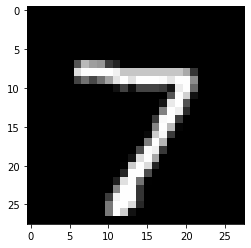

Model prediction: 7


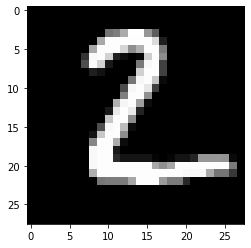

Model prediction: 2


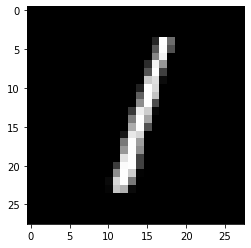

Model prediction: 1


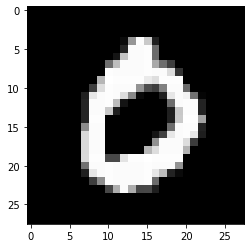

Model prediction: 0


In [92]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])